# Data Science Project - Mall Customer Segmentation
*(Shidqie Taufiqurrahman - 2020)*

Hello everyone!

In this data science project, I am gonna try to analyze and cluster mall customer from Mall Customer Segmentation dataset [1]. 

Data Information:

* 200 rows
* 5 columns

Metadata:
* CustomerID: Customer ID
* Gender: Whether the customer is a male or a female (Male, Female)
* Age: Customer's age
* Annual Income (k$): Annual Income of the customee (in thousand dollars)
* Spending Score (1-100): Score assigned by the mall based on customer behavior and spending nature

# 1. Introduction

To extract actionable insights from the dataset. I listed all the questions that came to mind below after assessing the dataset, and I tried to investigate all of them to find the insights:

1. How is the distribution of each feature in the dataset?
2. How is the correlation between features in the dataset? 
3. Can we cluster the customer using k-means algorithm?


# 2. Data Preparation

Import Library and import data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import plotly as py
import plotly.graph_objs as go

sns.set(style = 'darkgrid')

df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Data info

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Describe data

In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Check if there are missing values in the data

In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There are 0 missing values in Total Charges column, so were good to go

# 3. Data Visualization and Analysis

## 1. How is the distribution of each feature in the dataset?

Customer's gender percentage

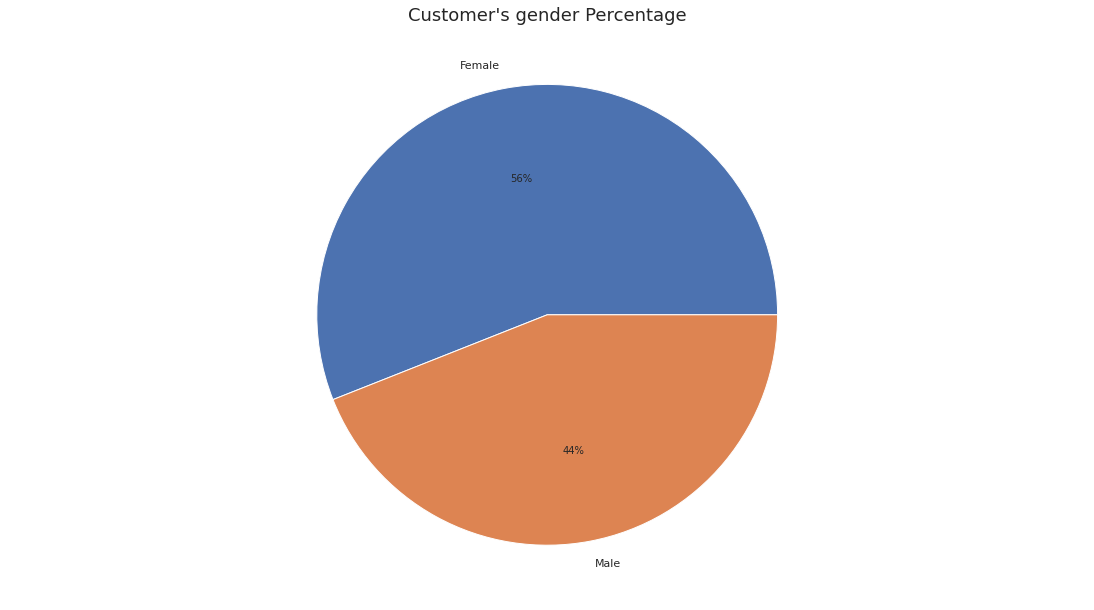

In [5]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['Female', 'Male']
churn = df.Gender.value_counts()
ax.pie(churn, labels = labels, autopct = '%.0f%%')
plt.title("Customer's gender Percentage", fontsize=18)
plt.show()

Now lets check the numeric features in the dataset (Age, Annual Income, and Spending score)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



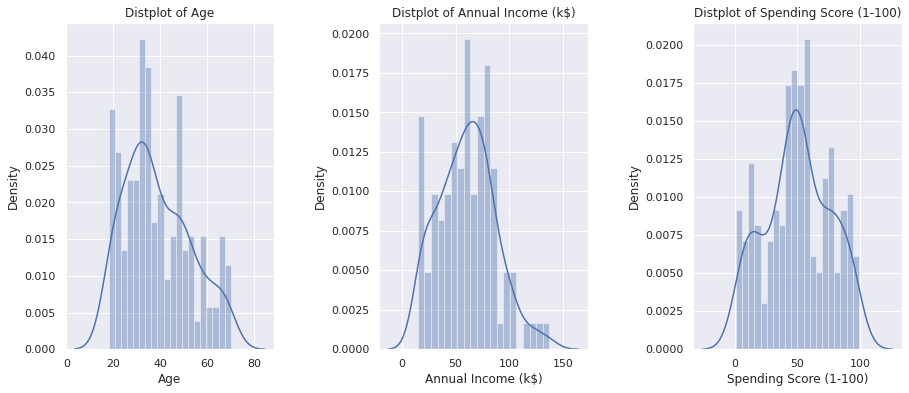

In [6]:
numeric_features = ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']
plt.figure(1 , figsize = (15 , 6))
n = 0 
for feature in numeric_features:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[feature] , bins = 20)
    plt.title('Distplot of {}'.format(feature))
plt.show()

In [7]:
df[numeric_features].describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [8]:
df[numeric_features].mode().iloc[0]

Age                       32.0
Annual Income (k$)        54.0
Spending Score (1-100)    42.0
Name: 0, dtype: float64

Insight:
1. There are slightly more female customers than male customers in the mall (56% and 44%)
2. The distribution of each numerical features is quite normal
3. Customer's age range start from 18-70 with average of 38.8 and mode of 32
4. Customer's annual income range start from 15-137k$ with average of 60.6k$ and mode of 54k$
5. Customer's spending score range start from 1-99 with average of 50.2 and mode of 42.

## 2. How is the correlation between features in the dataset?

Lets see each feature correlation with other feature using heatmap. First, we change the gender value into 0 and 1

In [9]:
df['Gender'].replace(to_replace='Male', value=1, inplace=True)
df['Gender'].replace(to_replace='Female',  value=0, inplace=True)

(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text major ticklabel objects>)

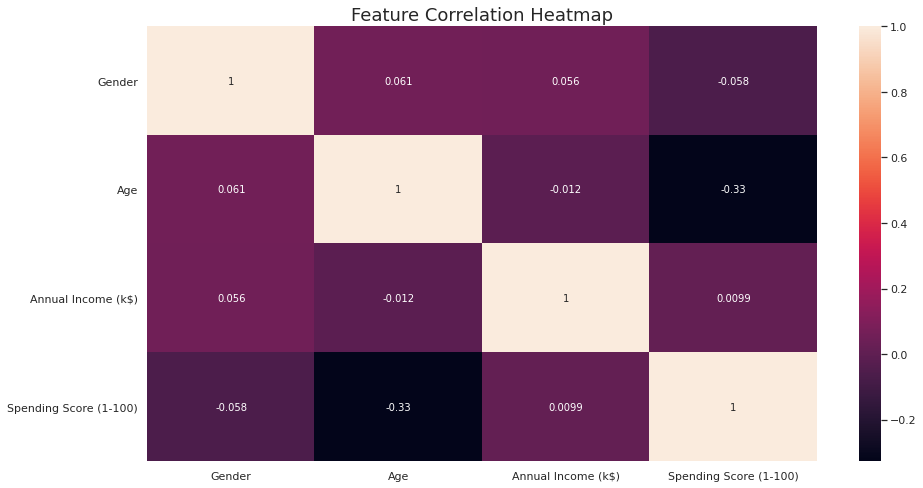

In [10]:
plt.figure(figsize=(15,8))
sns.heatmap(df.iloc[:,1:].corr(), annot=True)
plt.title('Feature Correlation Heatmap', fontsize=18)
plt.yticks(rotation=0)

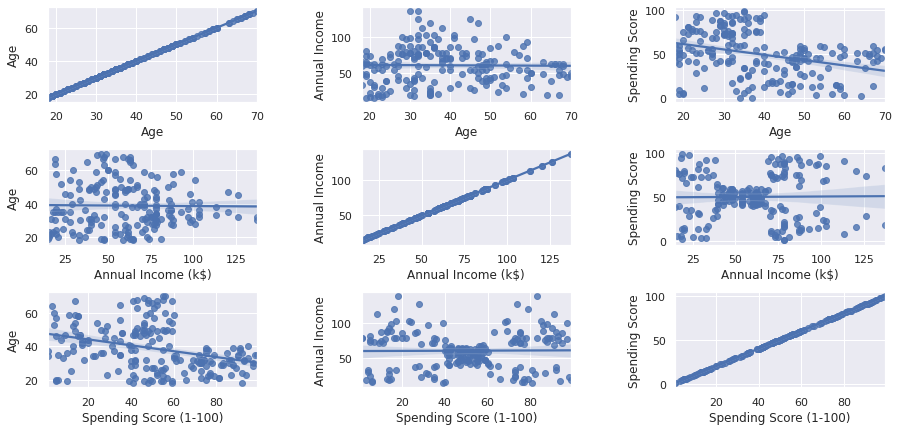

In [11]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

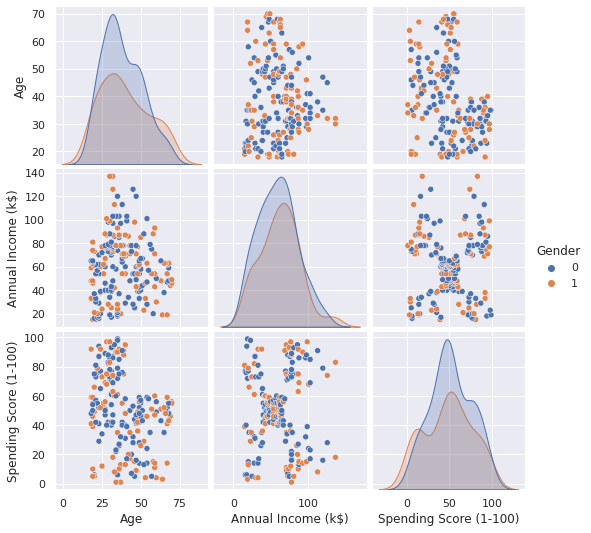

In [12]:
sns.pairplot(df.iloc[:,1:], hue= 'Gender')

Insight: 
* There are no significant correlation between each features
* We can cluster customers using the numerical features in the dataset
* Numerical Features pair plot with respect to gender didnt make any cluster

## 3. Can we cluster the customer using k-means algorithm?

We're gonna try to cluster the customer using numerical features. I am gonna try this combination

a. Age and Spending Score<br>
b. Age and Annual Income<br>
c. Annual Income and Spending Score<br>
d. Age, Annual Income, and Spending Score

In [13]:
def make_data(features):
  X = df[features].iloc[: , :].values
  return X

def ELBOW(X):
  inertia = []
  for n in range(1 , 11):
      algorithm = (KMeans(n_clusters = n))
      algorithm.fit(X)
      inertia.append(algorithm.inertia_)

  #Visualizing the ELBOW method to get the optimal value of K 
  plt.figure(1 , figsize = (15 ,6))
  plt.title('ELBOW Method', fontsize=18)
  plt.plot(np.arange(1 , 11) , inertia , 'o')
  plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
  plt.xlabel('Number of Clusters') , plt.ylabel('Inertia Value')
  plt.show()

def fit_kmeans(X,n):  
  # Fit K-Means algorithm with best cluster number
  algorithm = (KMeans(n_clusters = n))
  algorithm.fit(X)
  labels = algorithm.labels_
  centroids = algorithm.cluster_centers_

  return labels,centroids,algorithm

def visualize_cluster(features, X, labels, centroids, algorithm):
  # make artificial data to visualize cluster area
  h = 0.02
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

  plt.figure(1 , figsize = (15 , 7) )
  plt.clf()
  Z = Z.reshape(xx.shape)

  plt.imshow(Z , interpolation='nearest', 
            extent=(xx.min(), xx.max(), yy.min(), yy.max()),
            cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

  plt.scatter( x = features[0] ,y = features[1] , data = df , c = labels , 
              s = 200 )
  plt.scatter(x = centroids[: , 0] , y =  centroids[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
  plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
  plt.show()

### a. Age and Spending Score

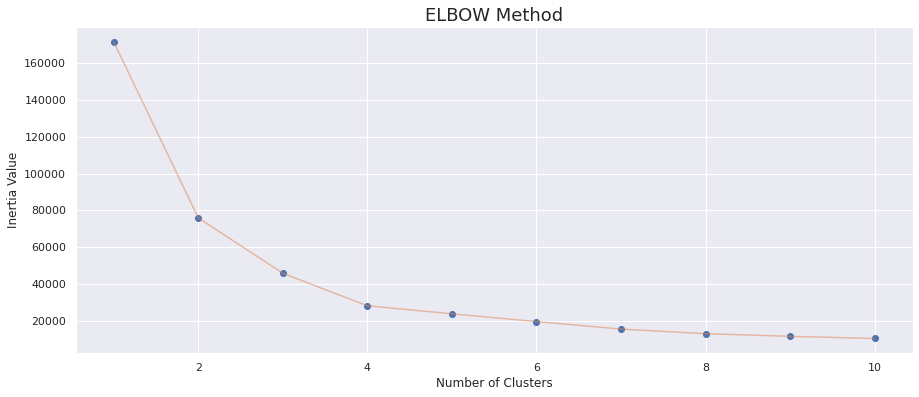

In [14]:
features1 = ['Age' , 'Spending Score (1-100)']
X1 = make_data(features1)
ELBOW(X1)

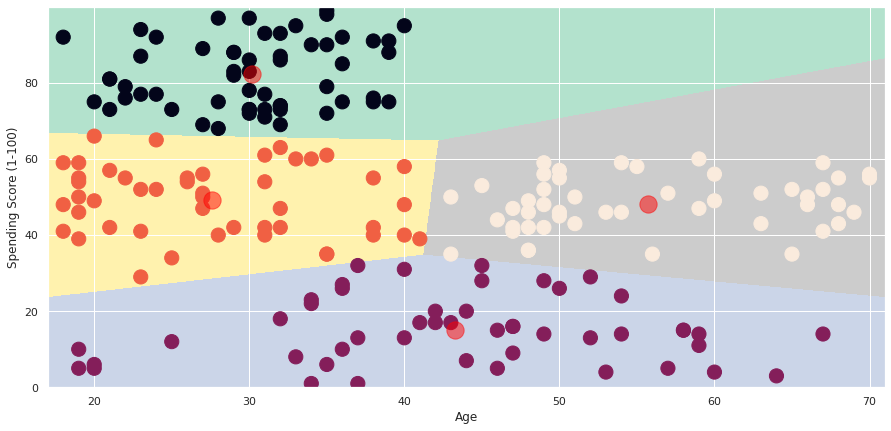

In [15]:
labels1, centroids1, algorithm1 = fit_kmeans(X1, 4)
visualize_cluster(features1, X1, labels1, centroids1, algorithm1)

### b. Age and Annual Income

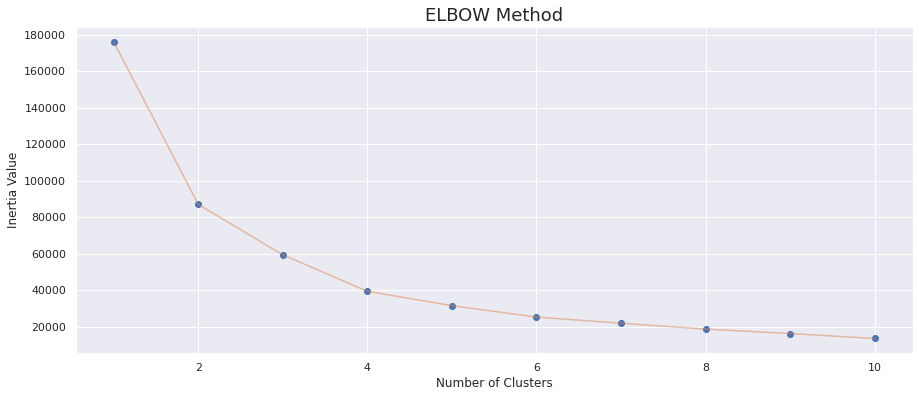

In [16]:
features2 = ['Age' , 'Annual Income (k$)']
X2 = make_data(features2)
ELBOW(X2)

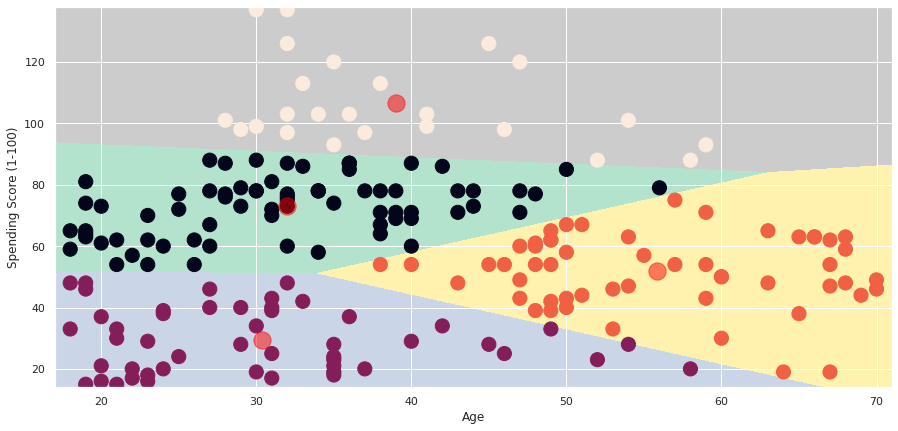

In [17]:
labels2, centroids2, algorithm2 = fit_kmeans(X2, 4)
visualize_cluster(features2, X2, labels2, centroids2, algorithm2)

### c. Spending Score and Annual Income

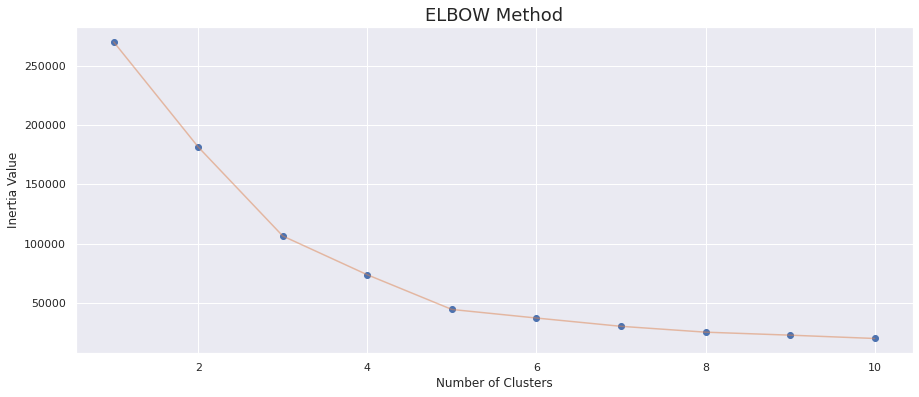

In [18]:
features3 = ['Spending Score (1-100)', 'Annual Income (k$)']
X3 = make_data(features3)
ELBOW(X3)

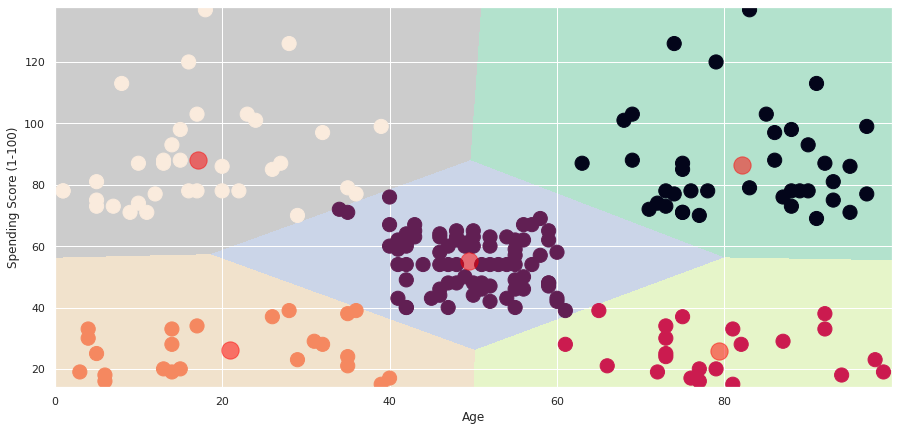

In [19]:
labels3, centroids3, algorithm3 = fit_kmeans(X3, 5)
visualize_cluster(features3, X3, labels3, centroids3, algorithm3)

### d. Age, Spending Score and Annual Income

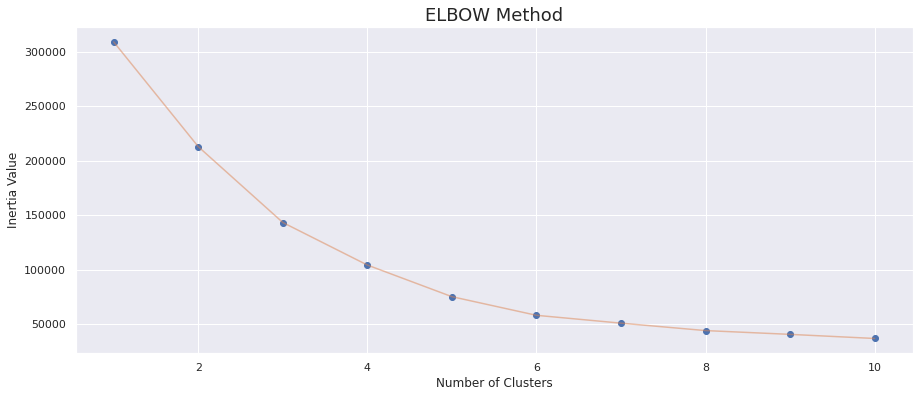

In [20]:
features4 = ['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']
X4 = make_data(features4)
ELBOW(X4)

In [21]:
labels4, centroids4, algorithm4 = fit_kmeans(X4, 6)

In [23]:
df['label4'] =  labels4
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df['label4'], 
        size= 20,
        line=dict(
            color= df['label4'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

## 6. Summary

The features that have high correlation with the churn is the same as what i analyzed

# References
[1] https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python<br>
[2] https://www.kaggle.com/kushal1996/customer-segmentation-k-means-analysis